**Work in progress**

I'm interested in prescribing of Lidocaine patches since 2015. Details of lidocaine plasters prescribing can be seen on [OpenPrescribing here](https://openprescribing.net/measure/lplidocaine/national/england/). Previous DataLab work on evaluation on the impact of NHS England guidance can be viewed [here in JRSM](https://journals.sagepub.com/doi/10.1177/0141076818808429)

The following example notebooks for reference for re-using code snippets
- https://github.com/ebmdatalab/lidocaine-change-detection-notebook/blob/master/notebooks/ccg-lidocaine-change.ipynb
- https://github.com/ebmdatalab/jupyter-notebooks/blob/master/Dementia%20Prescribing/Dementia%20Prescribing.ipynb
- https://github.com/ebmdatalab/jupyter-notebooks/blob/master/new_measures/Gabapentinoids/New%20Measure%20-%20Gabapentin%20and%20Pregabalin%20DDD.ipynb
- https://github.com/ebmdatalab/cd-legislation-notebook/blob/master/notebooks/legislative.change.ipynb
    

## Data Extraction

- Lidocaine here
- See below for list size (add navigation later)

In [1]:
#import libraries required for analysis
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq, charts, maps
import os

In [2]:
## ensuring the format is consistent for pounds and pence
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
## here we will extract all prescribing of Lidocaine patches by ccg (prev named pct)
sql= '''
SELECT
month,
  pct,
  SUM(quantity) AS quantity_of_plasters,
  SUM(actual_cost) AS actual_cost,
  SUM(net_cost) AS net_cost
FROM
  ebmdatalab.hscic.normalised_prescribing_standard AS presc
WHERE
  bnf_code LIKE "1502010J0%EL" # brand and Lidocaine patches
  AND month >= "2015-01-01"
GROUP BY
   month,
   pct
 '''

df_lidocaine = bq.cached_read(sql, csv_path=os.path.join('..', 'data','lidocaine.csv'))
df_lidocaine.head(10)

Downloading: 100%|██████████| 7295/7295 [00:00<00:00, 11945.92rows/s]


,month,pct,quantity_of_plasters,actual_cost,net_cost
0,2016-09-01 00:00:00+00:00,02P,2535,5669.99,6117.78
1,2016-09-01 00:00:00+00:00,06T,4750,10624.17,11463.32
2,2016-09-01 00:00:00+00:00,D4U1Y,3660,8186.91,8832.81
3,2015-03-01 00:00:00+00:00,D4U1Y,3130,7285.78,7866.83
4,2015-05-01 00:00:00+00:00,93C,5185,13143.69,14206.90
5,2015-10-01 00:00:00+00:00,00V,1530,3415.67,3692.38
6,2015-02-01 00:00:00+00:00,09D,2945,6712.14,7252.03
7,2015-09-01 00:00:00+00:00,36L,19890,52183.34,56330.85
8,2015-03-01 00:00:00+00:00,15E,9395,21000.92,22673.22
9,2015-03-01 00:00:00+00:00,99A,20400,46005.41,49666.30


## Charts
Here we will draw some charts to ilustrate national patterns

(0, 800000)

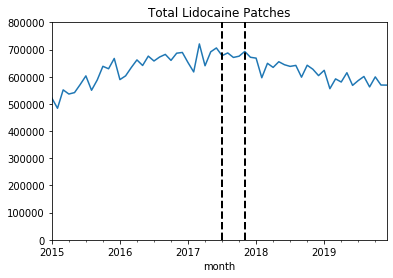

In [5]:
# total number of patches
ax = df_lidocaine.groupby(["month"])['quantity_of_plasters'].sum().plot(kind='line', title="Total Lidocaine Patches")
ax.axvline(pd.to_datetime('2017-07-01'), color='black', linestyle='--', lw=2) ##policy announced
ax.axvline(pd.to_datetime('2017-11-01'), color='black', linestyle='--', lw=2) ##consultation implemented
plt.ylim(0, 800000)

(0, 1637867.4891009997)

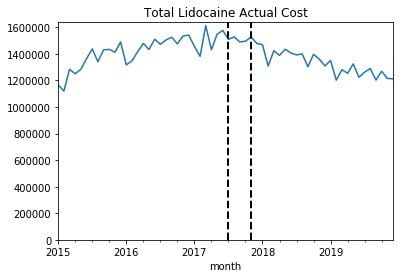

In [10]:
# total actual cost
ax = df_lidocaine.groupby(["month"])['actual_cost'].sum().plot(kind='line', title="Total Lidocaine Actual Cost")
ax.axvline(pd.to_datetime('2017-07-01'), color='black', linestyle='--', lw=2) ##policy announced
ax.axvline(pd.to_datetime('2017-11-01'), color='black', linestyle='--', lw=2) ##consultation implemented
plt.ylim(0, )

In [7]:
# total net cost

(0, 1765533.1594999994)

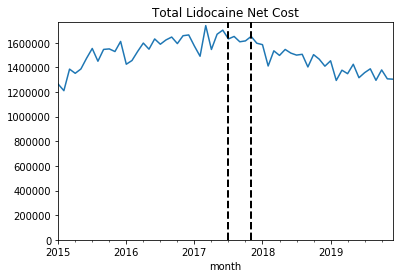

In [9]:
ax = df_lidocaine.groupby(["month"])['net_cost'].sum().plot(kind='line', title="Total Lidocaine Net Cost")
ax.axvline(pd.to_datetime('2017-07-01'), color='black', linestyle='--', lw=2) ##policy announced
ax.axvline(pd.to_datetime('2017-11-01'), color='black', linestyle='--', lw=2) ##consultation implemented
plt.ylim(0, )

## Listsize Information



In [12]:
# get data for patient list size (all patients)
sql2 = """
SELECT month, pct_id AS pct, sum(total_list_size) as list_size
FROM ebmdatalab.hscic.practice_statistics
WHERE
month <= "2015-01-01"
group by 
month, pct
order by
month, pct
"""
listsize_df = bq.cached_read(sql2, csv_path=os.path.join('..', 'data','list_size.csv'))
listsize_df['month'] = listsize_df['month'].astype('datetime64[ns]')
listsize_df.head(10)


Downloading: 100%|██████████| 298/298 [00:00<00:00, 1819.75rows/s]


,month,pct,list_size
0,2015-01-01,None,0
1,2015-01-01,00C,106673
2,2015-01-01,00D,288824
3,2015-01-01,00F,207011
4,2015-01-01,00G,163290
5,2015-01-01,00H,135799
6,2015-01-01,00J,252951
7,2015-01-01,00K,293006
8,2015-01-01,00L,322094
9,2015-01-01,00M,291290
